# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [234]:
print("Для воспроизводимости всех шагов")

Для воспроизводимости всех шагов


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [297]:
df_train = pd.read_csv('cars_train.csv')
df_test = pd.read_csv('cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [298]:
df_train.sample(10)

name  year  selling_price  km_driven  \
4117                  Honda BRV i-DTEC V MT  2019        1100000      50000   
2547          Maruti SX4 Celebration Diesel  2011         242000     120000   
1078              Maruti Ciaz VDi Plus SHVS  2015         650000      84000   
2483        Toyota Fortuner 2.8 2WD MT BSIV  2018        2900000      46000   
4463                Mahindra KUV 100 G80 K2  2019         400000      25000   
3729  Hyundai Grand i10 1.2 Kappa Sportz AT  2017         550000      10000   
3008                    Maruti Alto 800 VXI  2018         310000      10000   
183               Maruti Swift VXI Optional  2017         500000      20000   
4981                Hyundai i10 Sportz 1.1L  2015         350000      20000   
351             Maruti Eeco CNG 5 Seater AC  2020         409999      35000   

        fuel seller_type transmission         owner      mileage   engine  \
4117  Diesel  Individual       Manual  Second Owner    21.9 kmpl  1498 CC   
2547  Diesel  Individual       Manual   First Owner    21.5 kmpl  1248 CC   
1078  Diesel  Individual       Manual   First Owner   28.09 kmpl  1248 CC   
2483  Diesel  Individual       Manual   First Owner   14.24 kmpl  2755 CC   
4463  Petrol  Individual       Manual   First Owner   18.15 kmpl  1198 CC   
3729  Petrol  Individual    Automatic   First Owner    18.9 kmpl  1197 CC   
3008  Petrol  Individual       Manual   First Owner    24.7 kmpl   796 CC   
183   Petrol  Individual       Manual   First Owner    20.4 kmpl  1197 CC   
4981  Petrol  Individual       Manual   First Owner   19.81 kmpl  1086 CC   
351      CNG  Individual       Manual   First Owner  20.88 km/kg  1196 CC   

      max_power               torque  seats  
4117   98.6 bhp       200Nm@ 1750rpm    7.0  
2547   88.8 bhp       200Nm@ 1750rpm    5.0  
1078   88.5 bhp       200Nm@ 1750rpm    5.0  
2483  174.5 bhp  420Nm@ 1400-2600rpm    7.0  
4463     82 bhp  115Nm@ 3500-3600rpm    6.0  
3729  81.86 bhp    113.75nm@ 4000rpm    5.0  
3008   47.3 bhp        69Nm@ 3500rpm    5.0  
183   81.80 bhp       113Nm@ 4200rpm    5.0  
4981  68.05 bhp     99.04Nm@ 4500rpm    5.0  
351    61.7 bhp        85Nm@ 3000rpm    5.0

(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [299]:
display(df_train.head(5))
display(df_train.tail(5))

name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
3  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   
4  Individual       Manual   First Owner  20.14 kmpl  1197 CC   81.86 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2  22.4 kgm at 1750-2750rpm    5.0  
3     11.5@ 4,500(kgm@ rpm)    5.0  
4         113.75nm@ 4000rpm    5.0

name  year  selling_price  km_driven    fuel  \
6994       Hyundai i20 Magna  2013         320000     110000  Petrol   
6995   Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
6996  Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
6997         Tata Indigo CR4  2013         290000      25000  Diesel   
6998         Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission                 owner     mileage   engine  \
6994  Individual       Manual           First Owner   18.5 kmpl  1197 CC   
6995  Individual       Manual  Fourth & Above Owner   16.8 kmpl  1493 CC   
6996  Individual       Manual           First Owner   19.3 kmpl  1248 CC   
6997  Individual       Manual           First Owner  23.57 kmpl  1396 CC   
6998  Individual       Manual           First Owner  23.57 kmpl  1396 CC   

      max_power                     torque  seats  
6994  82.85 bhp           113.7Nm@ 4000rpm    5.0  
6995    110 bhp  24@ 1,900-2,750(kgm@ rpm)    5.0  
6996   73.9 bhp             190Nm@ 2000rpm    5.0  
6997     70 bhp        140Nm@ 1800-3000rpm    5.0  
6998     70 bhp        140Nm@ 1800-3000rpm    5.0

(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [300]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


In [301]:
df_train.describe(include='object')

name    fuel seller_type transmission        owner  \
count                     6999    6999        6999         6999         6999   
unique                    1924       4           3            2            5   
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner   
freq                       116    3793        5826         6095         4587   

          mileage   engine max_power          torque  
count        6797     6797      6803            6796  
unique        386      120       316             419  
top     18.9 kmpl  1248 CC    74 bhp  190Nm@ 2000rpm  
freq          197      885       330             468

(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [302]:
null_count = df_train.isna().sum(axis=0)
print('Столбцы, в которых есть пропуски')
print(null_count[null_count>0])

Столбцы, в которых есть пропуски
mileage      202
engine       202
max_power    196
torque       203
seats        202
dtype: int64


(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [303]:
feats=list(set(df_train.columns)-set('selling_price'))
dup_mask = df_train.duplicated(subset=feats)
dup_mask.sum()

985

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [304]:
df_train[dup_mask].head(3)

name  year  selling_price  km_driven  \
254                  Hyundai Grand i10 Sportz  2017         450000      35000   
258                          Maruti Swift VXI  2012         330000      50000   
324  Jaguar XE 2016-2019 2.0L Diesel Prestige  2017        2625000       9000   

       fuel seller_type transmission         owner    mileage   engine  \
254  Petrol  Individual       Manual   First Owner  18.9 kmpl  1197 CC   
258  Petrol  Individual       Manual  Second Owner  18.6 kmpl  1197 CC   
324  Diesel      Dealer    Automatic   First Owner  13.6 kmpl  1999 CC   

    max_power               torque  seats  
254    82 bhp       114Nm@ 4000rpm    5.0  
258  85.8 bhp       114Nm@ 4000rpm    5.0  
324   177 bhp  430Nm@ 1750-2500rpm    5.0

In [305]:
df_train.shape

(6999, 13)

(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [306]:
df_train = df_train.sort_values('selling_price', ascending=False).drop_duplicates(subset=feats, keep='first').sort_index()

In [307]:
df_train.drop_duplicates(feats).shape

(6014, 13)

In [308]:
assert df_train.shape == (6014, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [309]:
df_train.reset_index(drop=True, inplace=True)

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [310]:
# Преобразование признаков ['mileage', 'engine', 'max_power']
def remove_units(df, columns):
    df_ = df.copy()
    def transform_(x):
        try:
            return(float(str(x).split(' ')[0]))
        except:
            return None
            
    for col in columns:
        df_.loc[:, col] = df[col].apply(lambda x: transform_(x))
    
    return df_

cols_to_transform = ['mileage', 'engine', 'max_power']
df_train = remove_units(df_train, cols_to_transform)
df_test = remove_units(df_test, cols_to_transform)

In [311]:
# Преобразование torque
# nm = 9.80665*kgm

import re
def get_torque(df):  

    def split_torque_(x):
        if pd.isna(x):
            return (np.NaN, np.NaN)
        try:
            torque, rpm = tuple(re.findall(r"\d*\S*\d+", x))
            # Единицы измерения torque
            torque = float(torque.replace(',','.'))

            if "kg" in x.lower():
                torque = np.round(torque*9.80665,3)
            
            # rpm задан в виде интервала
            if "-" in rpm :
                rpm = float(rpm.split("-")[1].replace(",","."))
            elif '~' in rpm:
                rpm = float(rpm.split('~')[1].replace(',','.'))
            else:
                rpm = float(rpm.replace(',','.'))
            return (torque, rpm)
            
        except:
            return (np.NaN, np.NaN)
    
    vals = []
    vals.append(df['torque'].apply(split_torque_))

    df['torque'] = [x[0] for x in vals[0]]
    df['max_rpm'] = [x[1] for x in vals[0]]

    return df

df_train = get_torque(df_train)
df_test = get_torque(df_test)

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [312]:
df_train.fillna(df_train.median(), inplace=True)
df_test.fillna(df_test.median(), inplace=True)

display(df_train.isna().sum(axis=0))
display(df_test.isna().sum(axis=0))

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
max_rpm          0
dtype: int64

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
max_rpm          0
dtype: int64


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [313]:
print("Потому что по смыслу число мест связано с назначением автомобиля",
      "\nОтсюда связь между числом мест и стоимостью автомобиля может быть нелинейной",
      "\nПример: 2 места - купе - дорогой автомобиль, 4 места - седан - недорогой автомобиль, 7 мест - большой дорогой автомобиль")

Потому что по смыслу число мест связано с назначением автомобиля 
Отсюда связь между числом мест и стоимостью автомобиля может быть нелинейной 
Пример: 2 места - купе - дорогой автомобиль, 4 места - седан - недорогой автомобиль, 7 мест - большой дорогой автомобиль


In [314]:
df_train = df_train.astype({'engine':'int', 'seats':'int'})
df_test = df_test.astype({'engine':'int', 'seats':'int'})

df_train.head()

name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner  mileage  engine  max_power   torque  \
0  Individual       Manual   First Owner    23.40    1248      74.00  190.000   
1  Individual       Manual  Second Owner    21.14    1498     103.52  250.000   
2  Individual       Manual   First Owner    23.00    1396      90.00  219.669   
3  Individual       Manual   First Owner    16.10    1298      88.20  112.776   
4  Individual       Manual   First Owner    20.14    1197      81.86  113.750   

   seats  max_rpm  
0      5   2000.0  
1      5   2500.0  
2      5   2750.0  
3      5      4.5  
4      5   4000.0

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

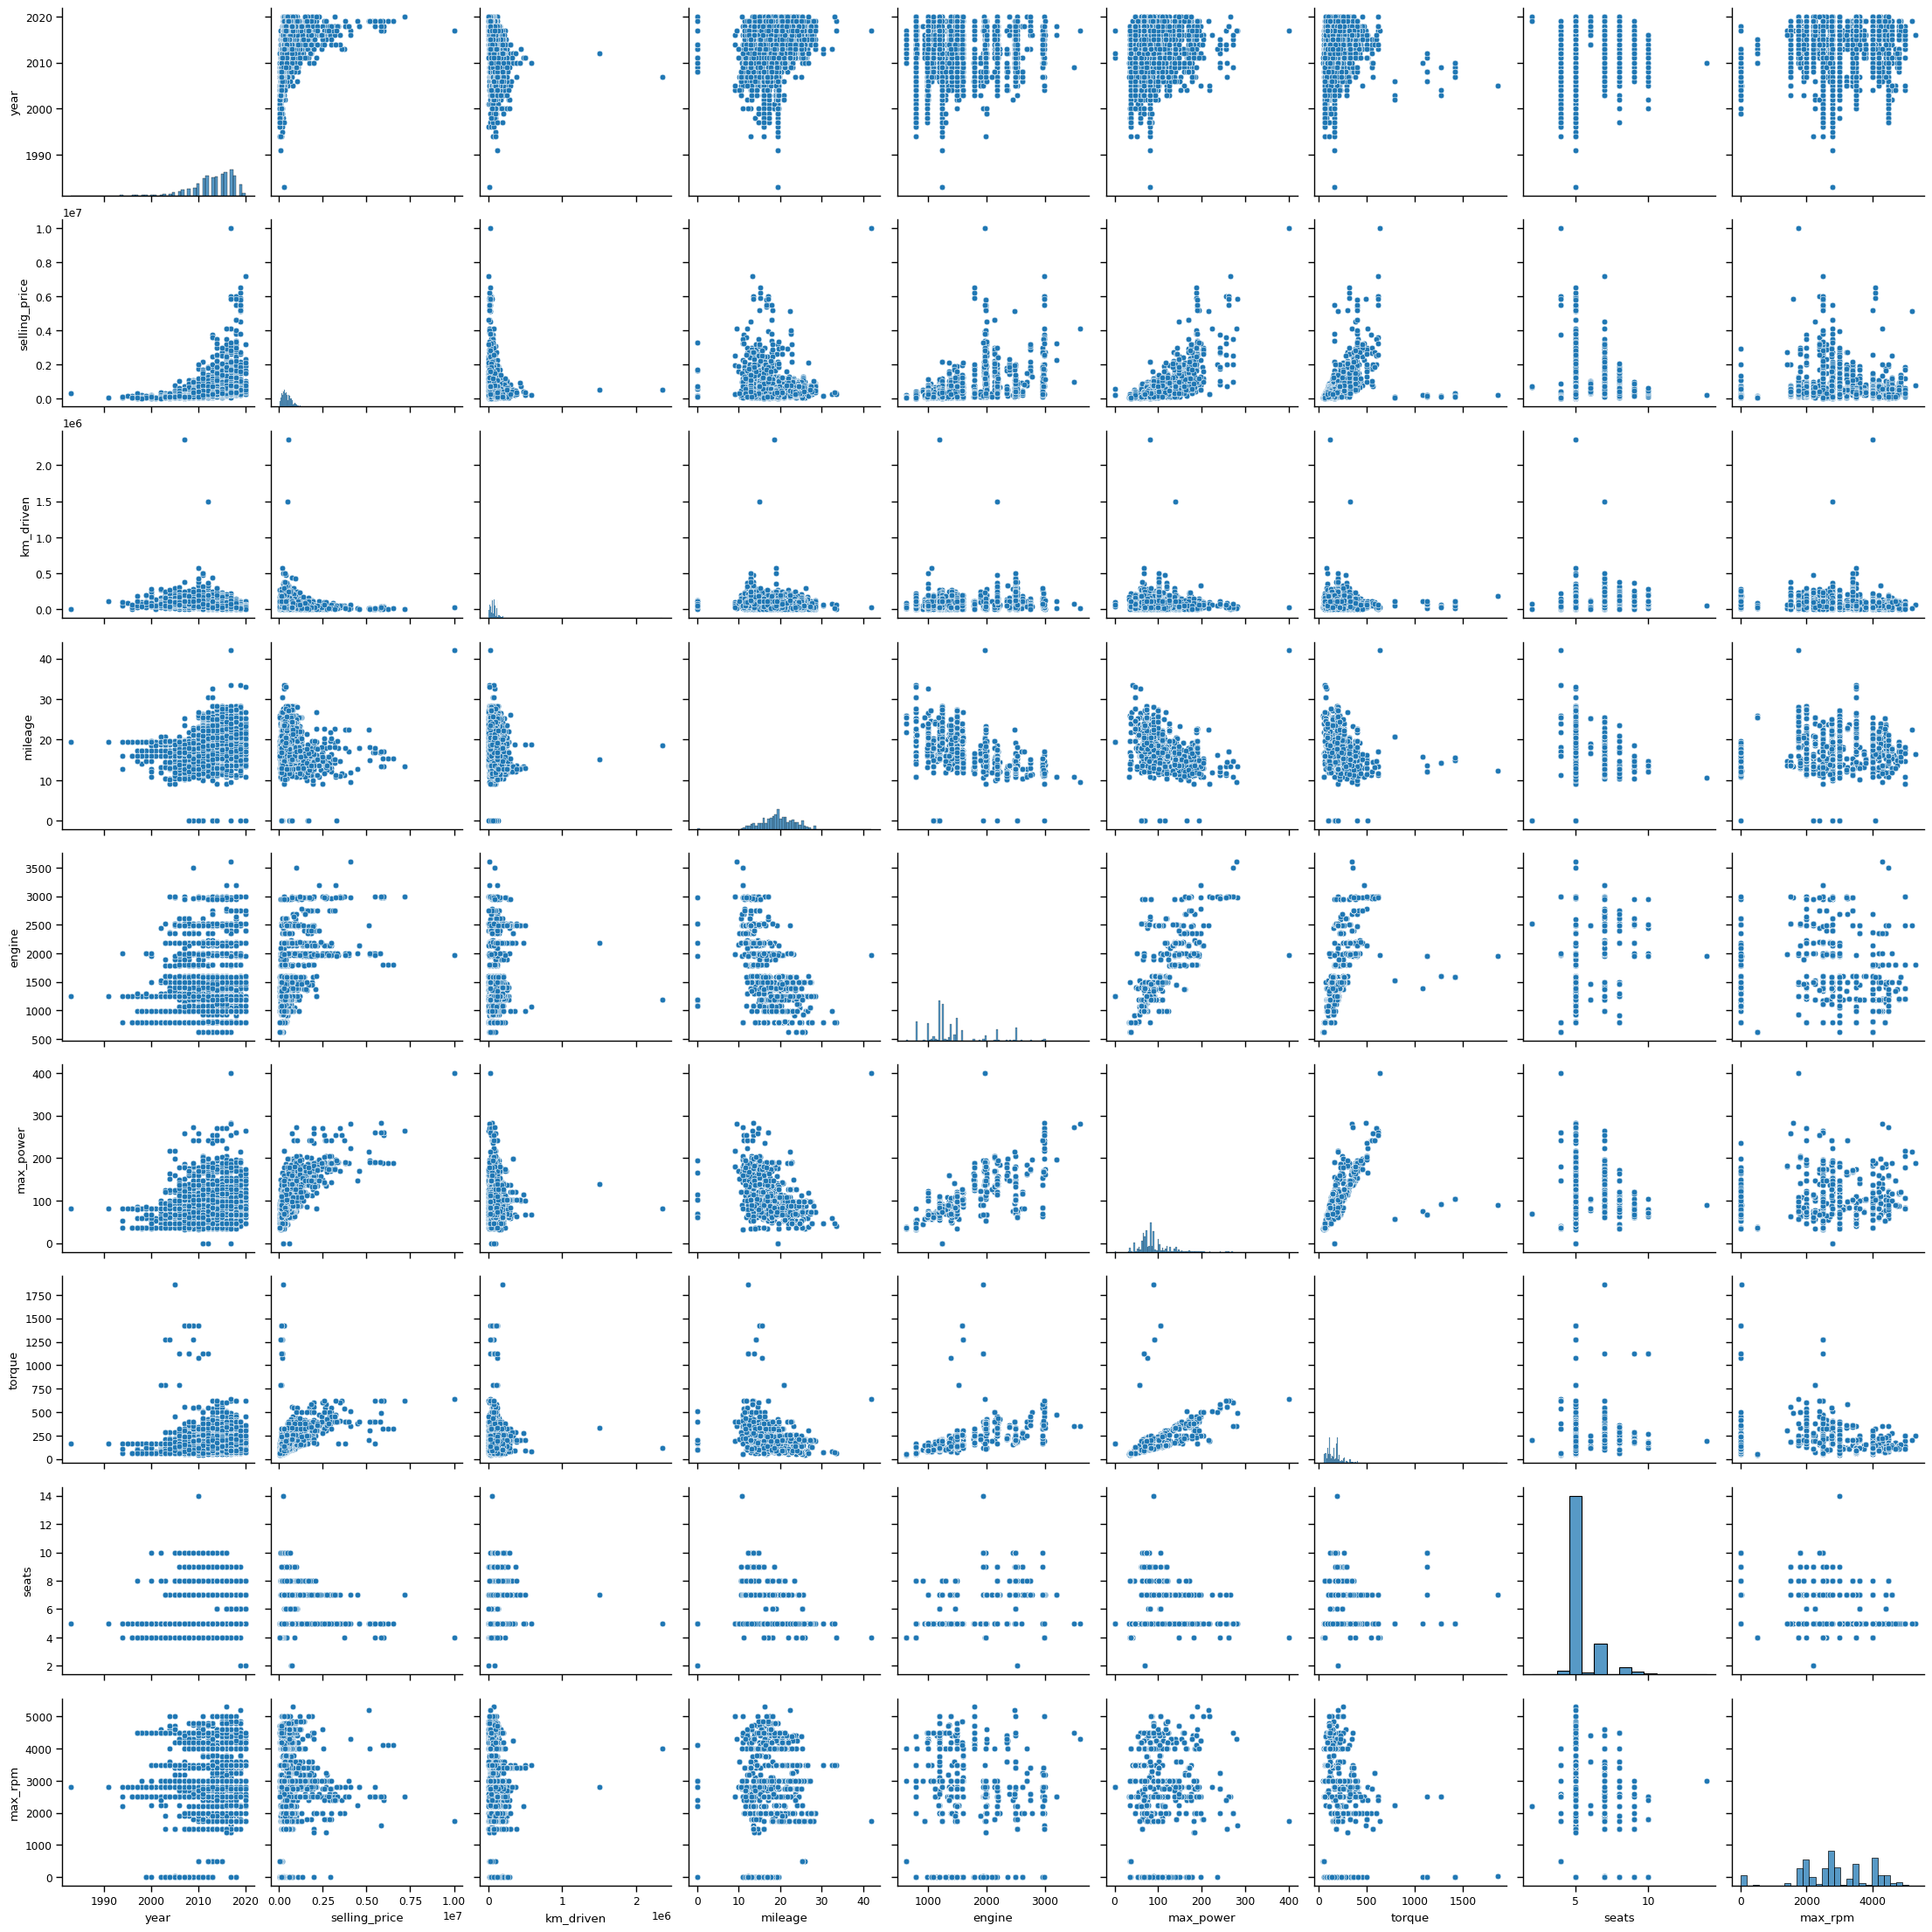

In [253]:
sns.pairplot(df_train)

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

In [47]:
# Что можно сказать о связи предикторов с целевой переменной?
print('Чем старше машина, тем она дешевле')
print('Чем больше пробег, тем машина дешевле')
print('Чем выше мощность двигателя и крутящий момент, тем она дороже')

# Корреляция признаков
print('Линейно связаны:')
print('Крутящий момент, объем двигателя и максимальная мощность тесно связаны')
print('Крутящий момент и максимальная мощность')
print('Крутящий момент и максимальная мощность')

Чем старше машина, тем она дешевле
Чем больше пробег, тем машина дешевле
Чем выше мощность двигателя и крутящий момент, тем она дороже
Линейно связаны:
Крутящий момент, объем двигателя и максимальная мощность тесно связаны
Крутящий момент и максимальная мощность
Крутящий момент и максимальная мощность


(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

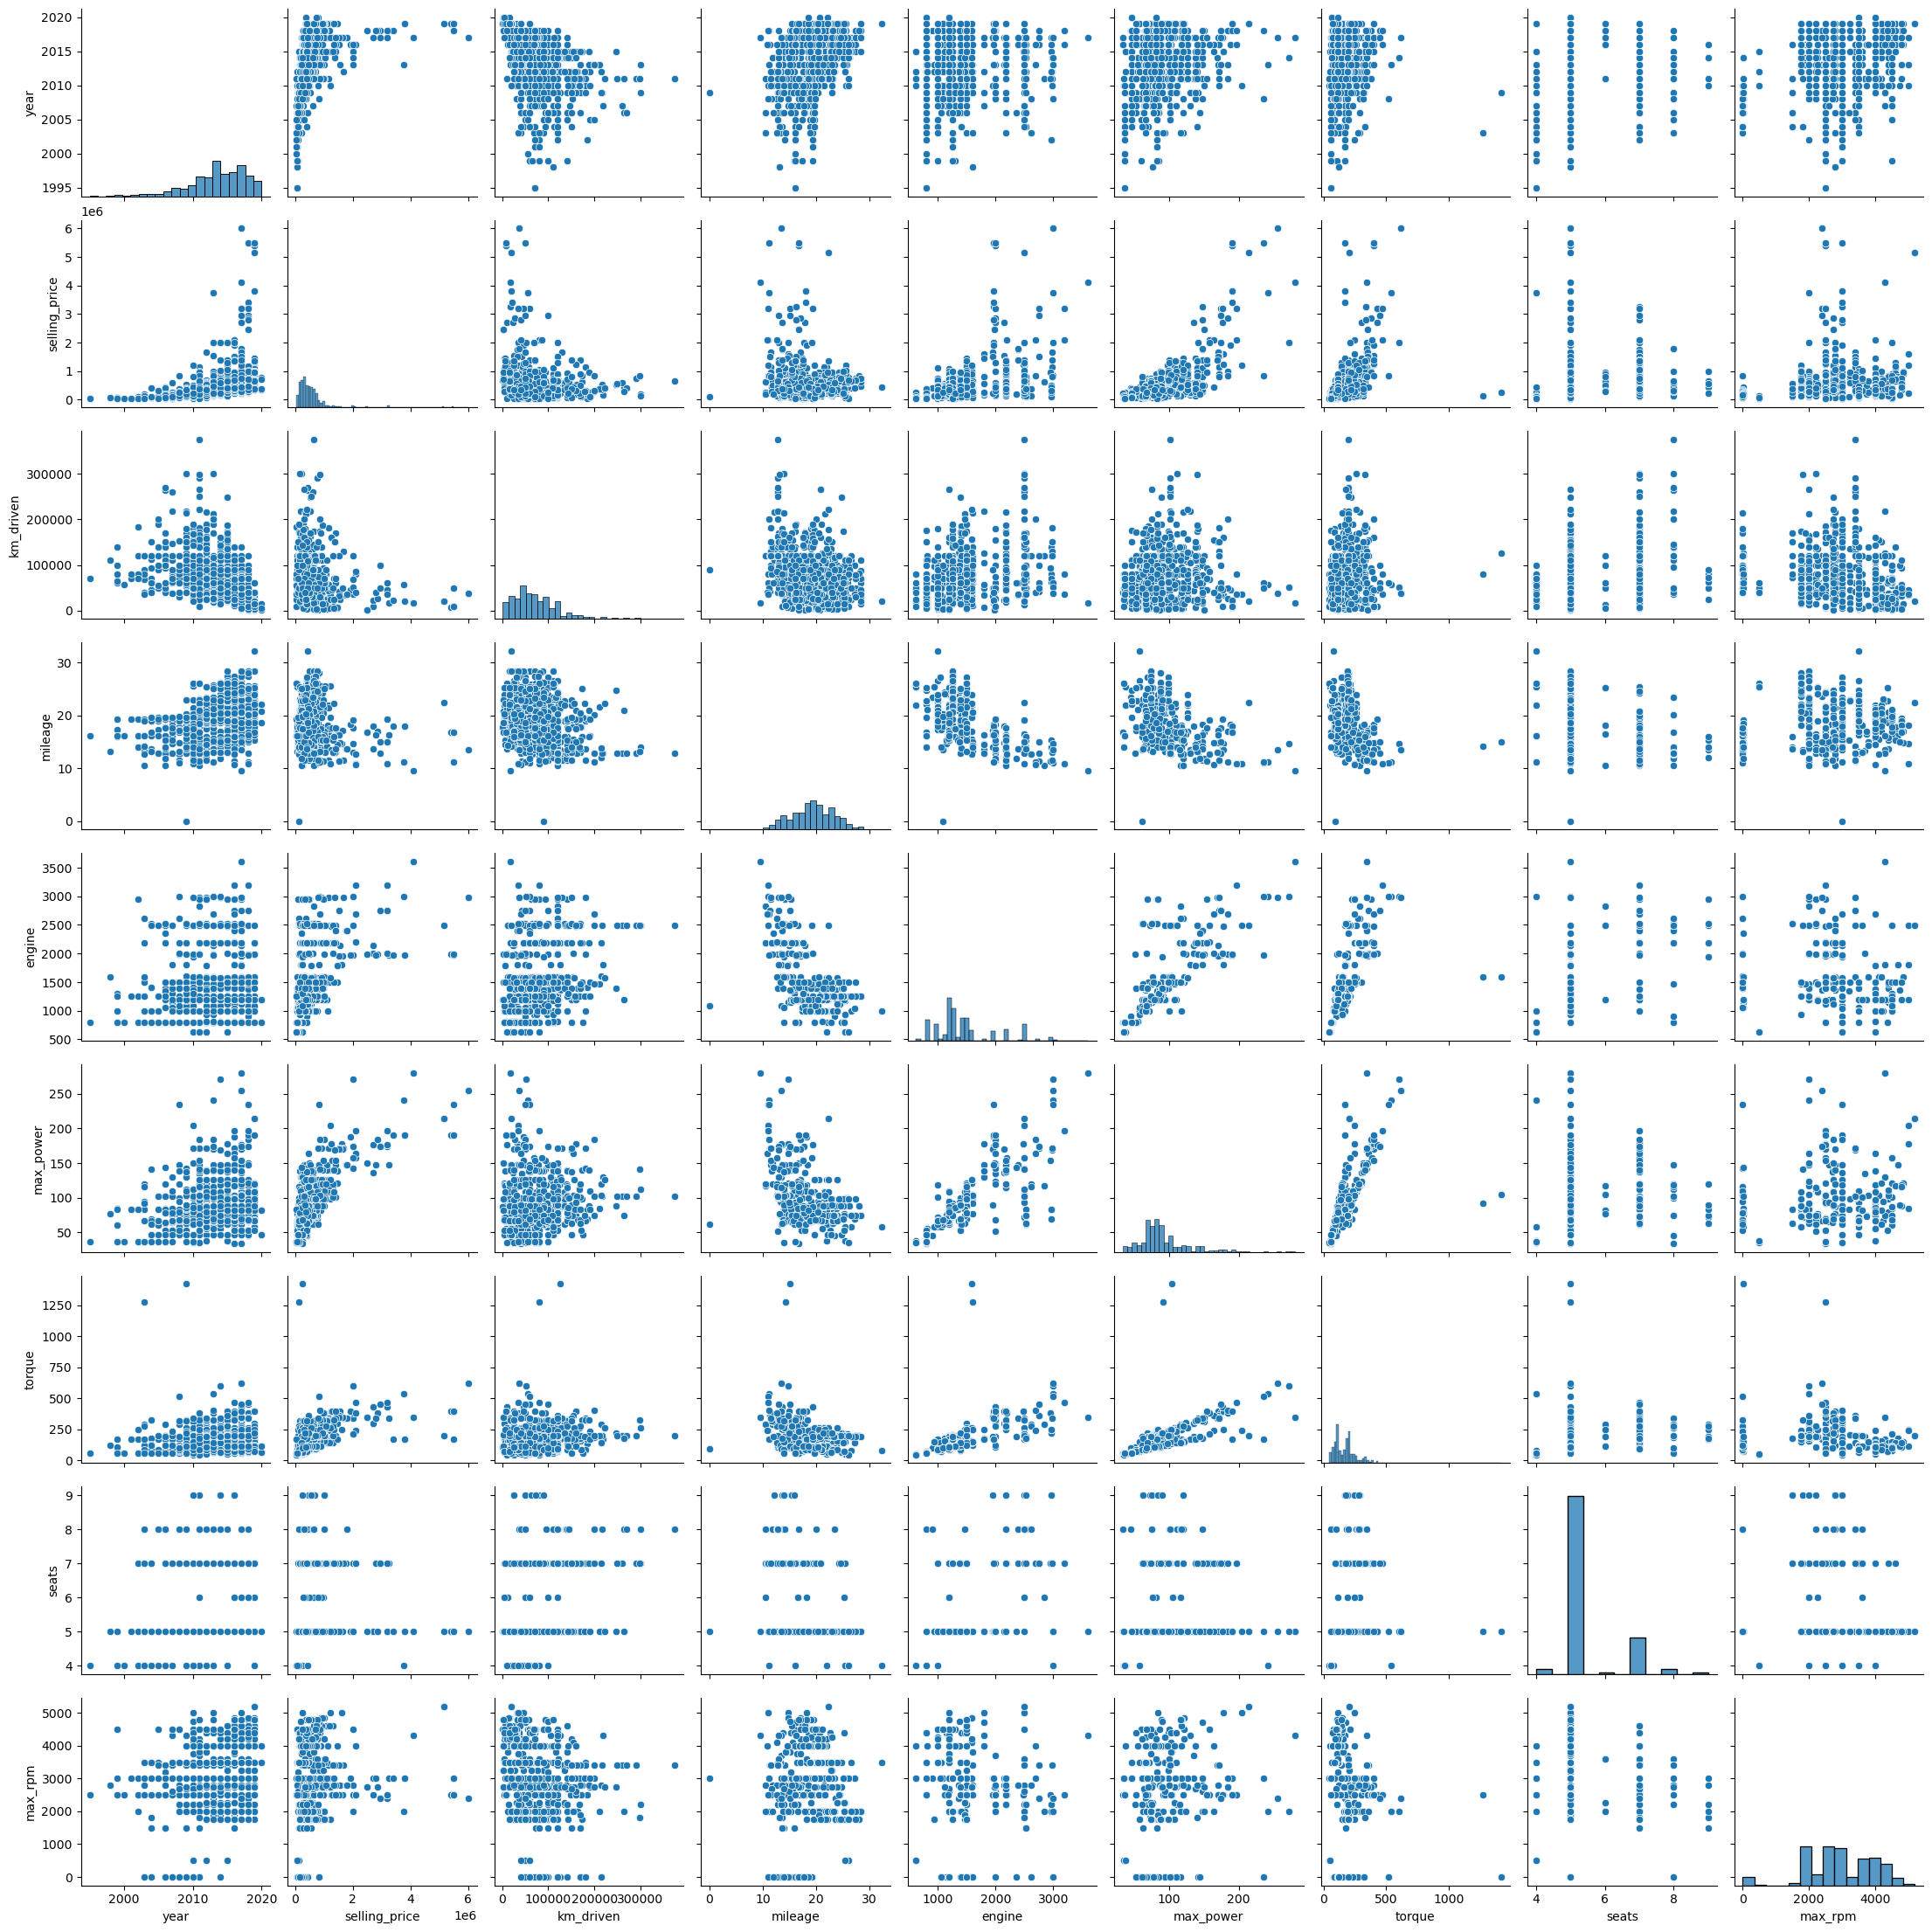

In [46]:
sns.pairplot(df_test)

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

<AxesSubplot:>

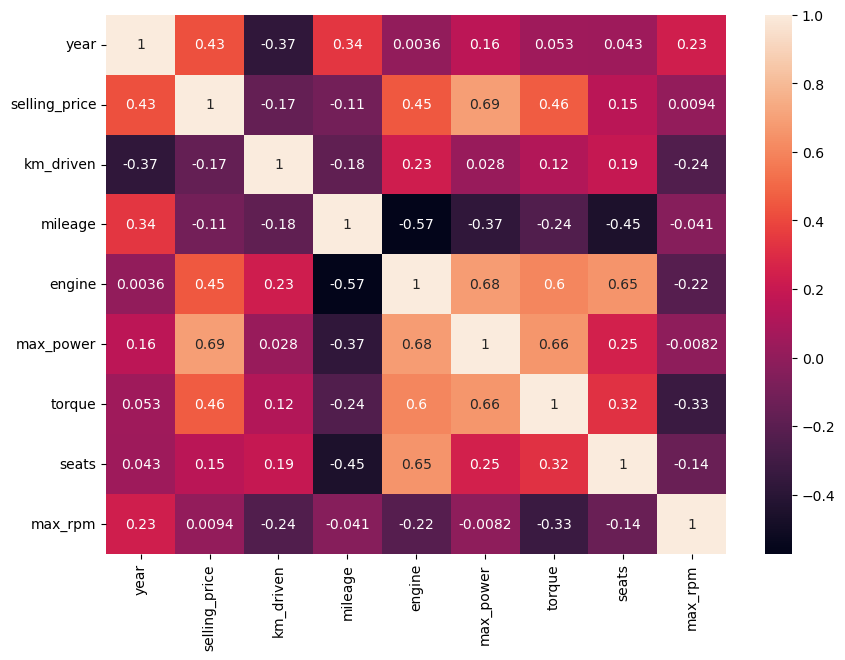

In [47]:
plt.figure(figsize=(10,7))
sns.heatmap(df_train.corr(), annot=True)

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
- Меньше всего (ближе всего к 0) скоррелированы расход топлива и цена автомобиля
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
- Между признаками max_power, engine и torque
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>
- Меньше год = раньше?) Если да, то утверждение верно, машина 1990 года в датасете проехала в среднем больше машины 2020 года

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

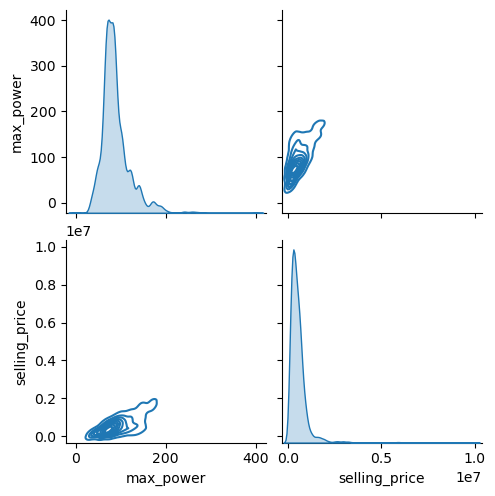

In [48]:
sns.pairplot(df_train[['max_power','selling_price']], kind='kde')

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

In [322]:
# Отдельно посмотрим на признаки с корреляцией > 0.5

feats = ['year',
 'selling_price',
 'km_driven',
 'mileage',
 'engine',
 'max_power',
 'torque',
 'seats',
 'max_rpm']

pairs = df_train.corr(method='pearson', numeric_only=True)[feats].stack()
pairs_list = list(pairs[pairs.abs().gt(0.5)].index)
pairs_list = [x for x in pairs_list if x[0]!=x[1]]

# Скоррелированные признаки
corr_feats = list(set(sum(pairs_list, ())))

# Категориальные признаки < 10 уникальных значений
categorical_feats = list(df_train.columns[df_train.nunique()<10])

print('Скоррелированные признаки (>0.5 Pearson)', corr_feats)
print('Категориальные признаки (< 10 уникальных значений)', categorical_feats)

Скоррелированные признаки (>0.5 Pearson) ['selling_price', 'seats', 'torque', 'mileage', 'max_power', 'engine']
Категориальные признаки (< 10 уникальных значений) ['fuel', 'seller_type', 'transmission', 'owner', 'seats']


In [323]:
variables = corr_feats

plt.figure(figsize=(5,5))

sns.set_context('paper')

# for cat_feat in categorical_feats:
def pairplot(cat_feat):
    g = sns.PairGrid(data=df_train.sample(1_000), 
                    vars=variables,
                    diag_sharey=False, 
                    corner=False, 
                    hue=cat_feat
                    )
    g.map_upper(sns.scatterplot)
    g.map_diag(sns.histplot)
    g.map_lower(sns.scatterplot)
    g.add_legend()
    return g

<Figure size 500x500 with 0 Axes>

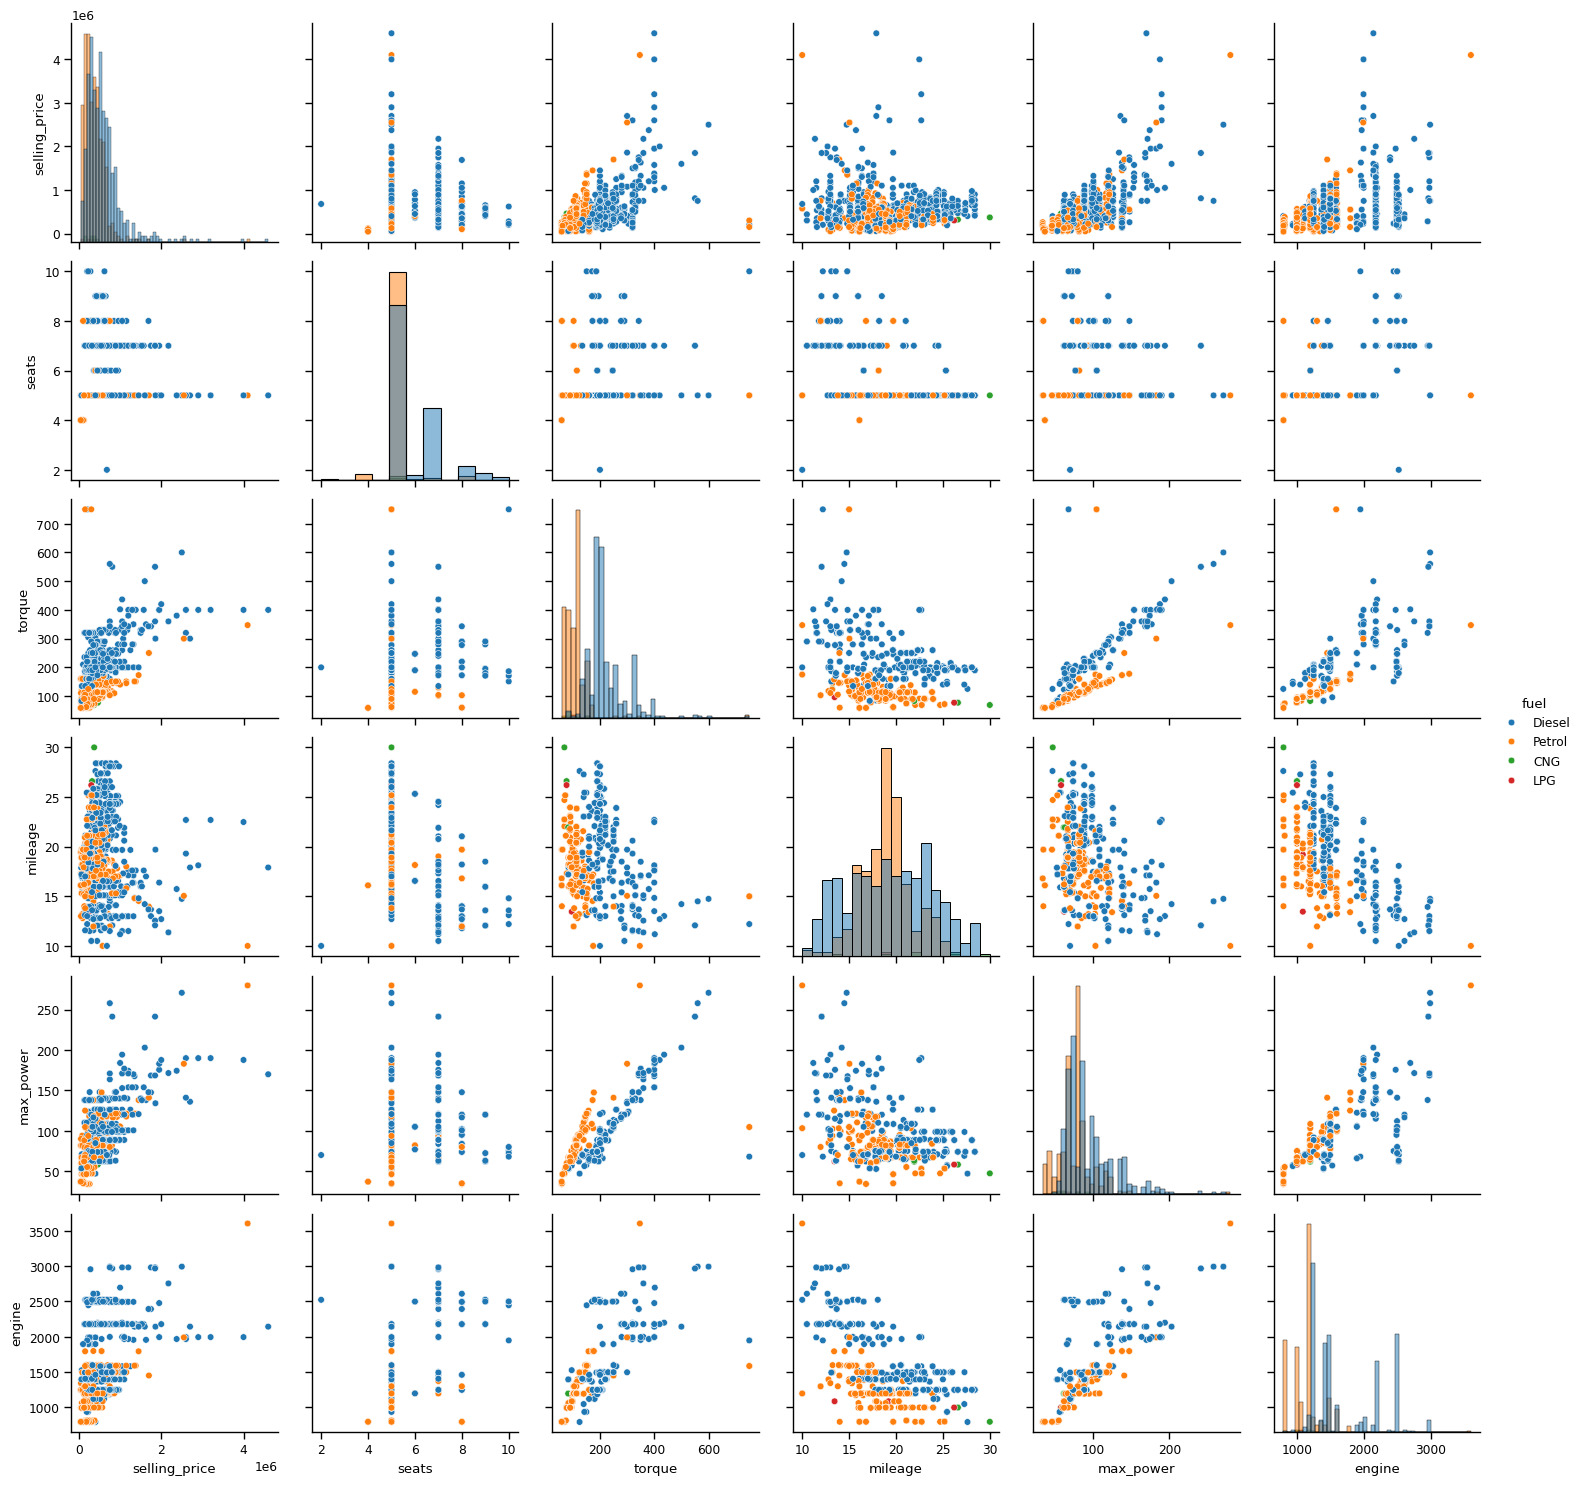

In [324]:
pairplot('fuel')

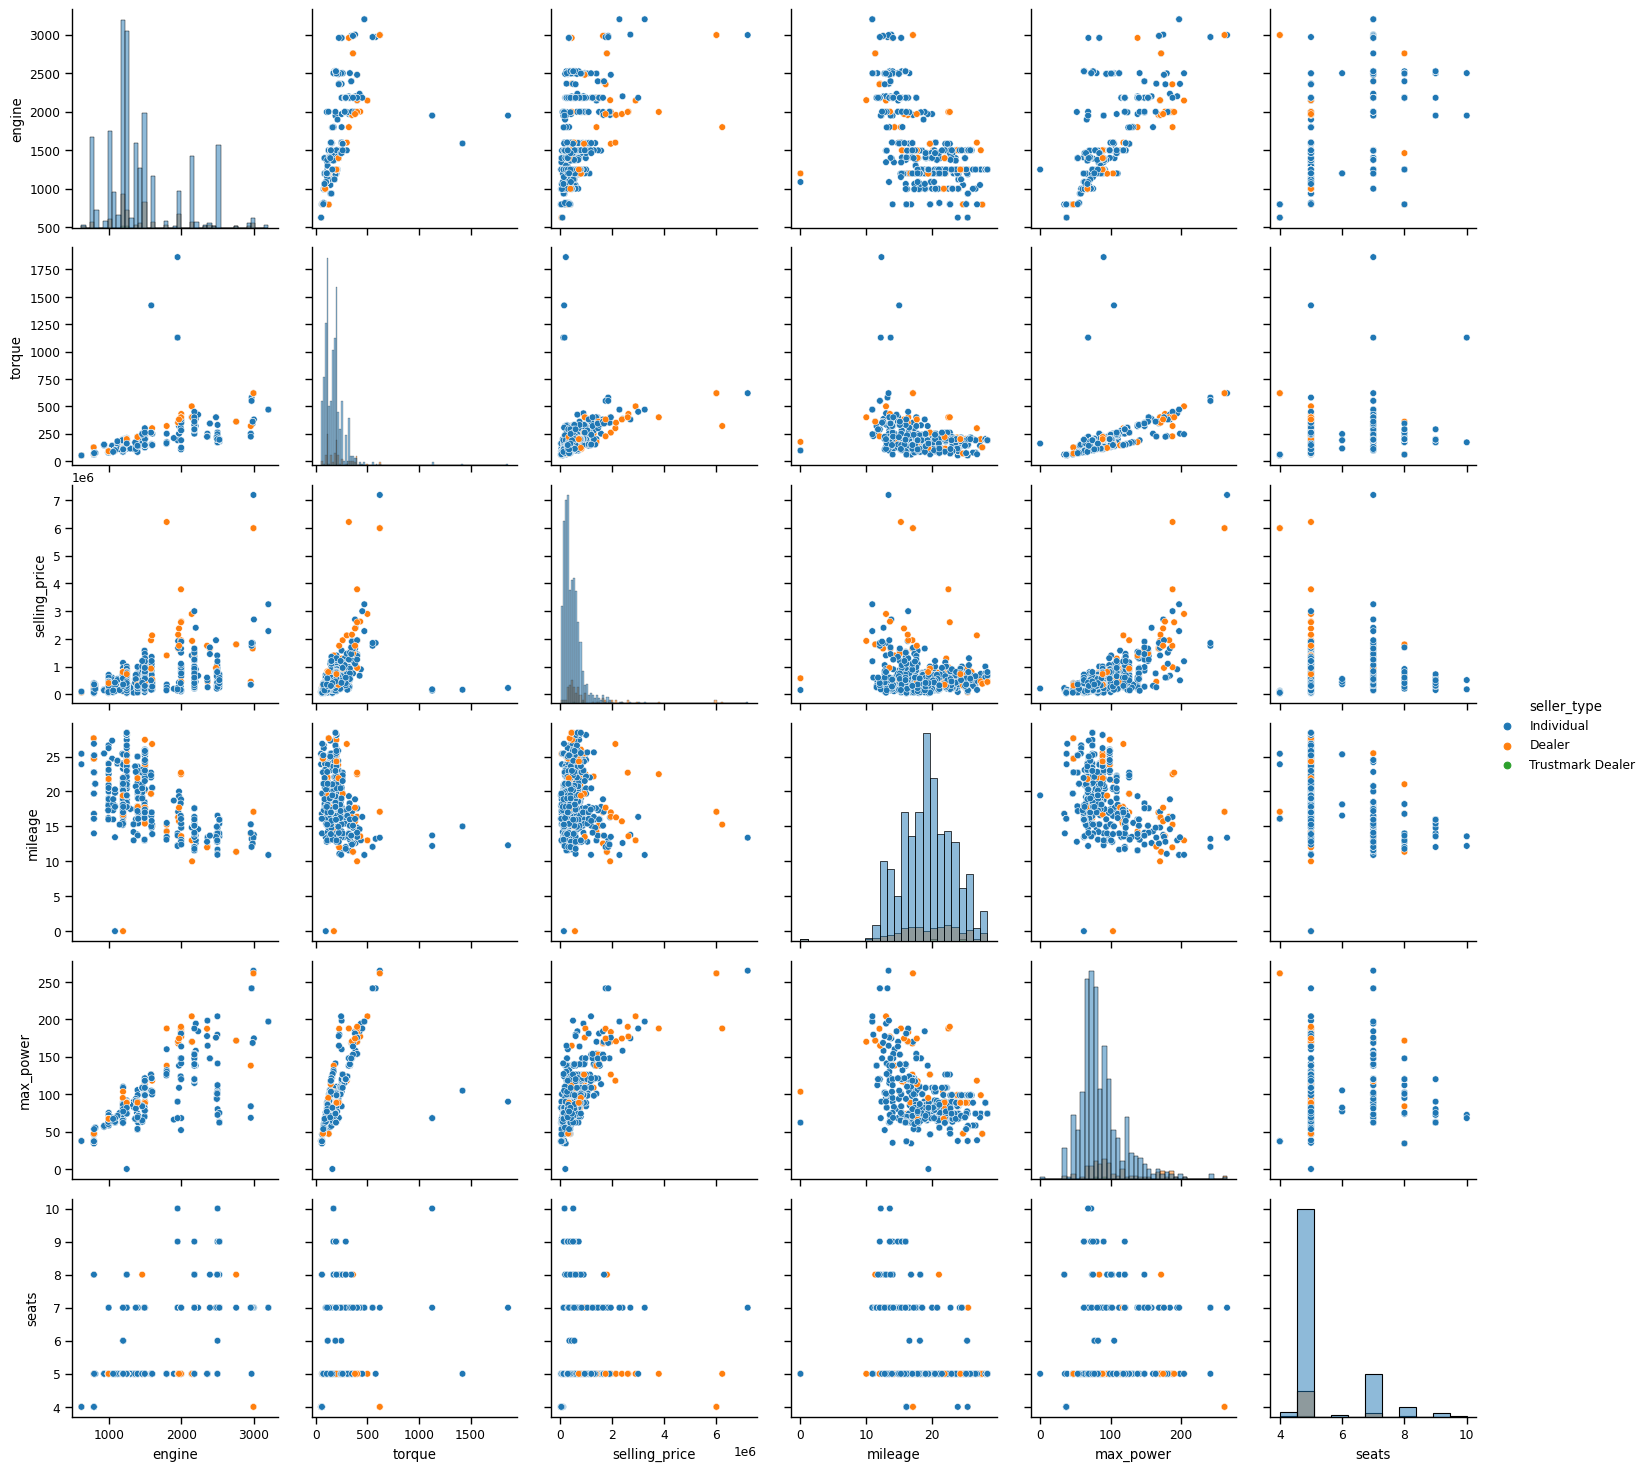

In [52]:
pairplot('seller_type')
# 'transmission', 'owner', 'seats'

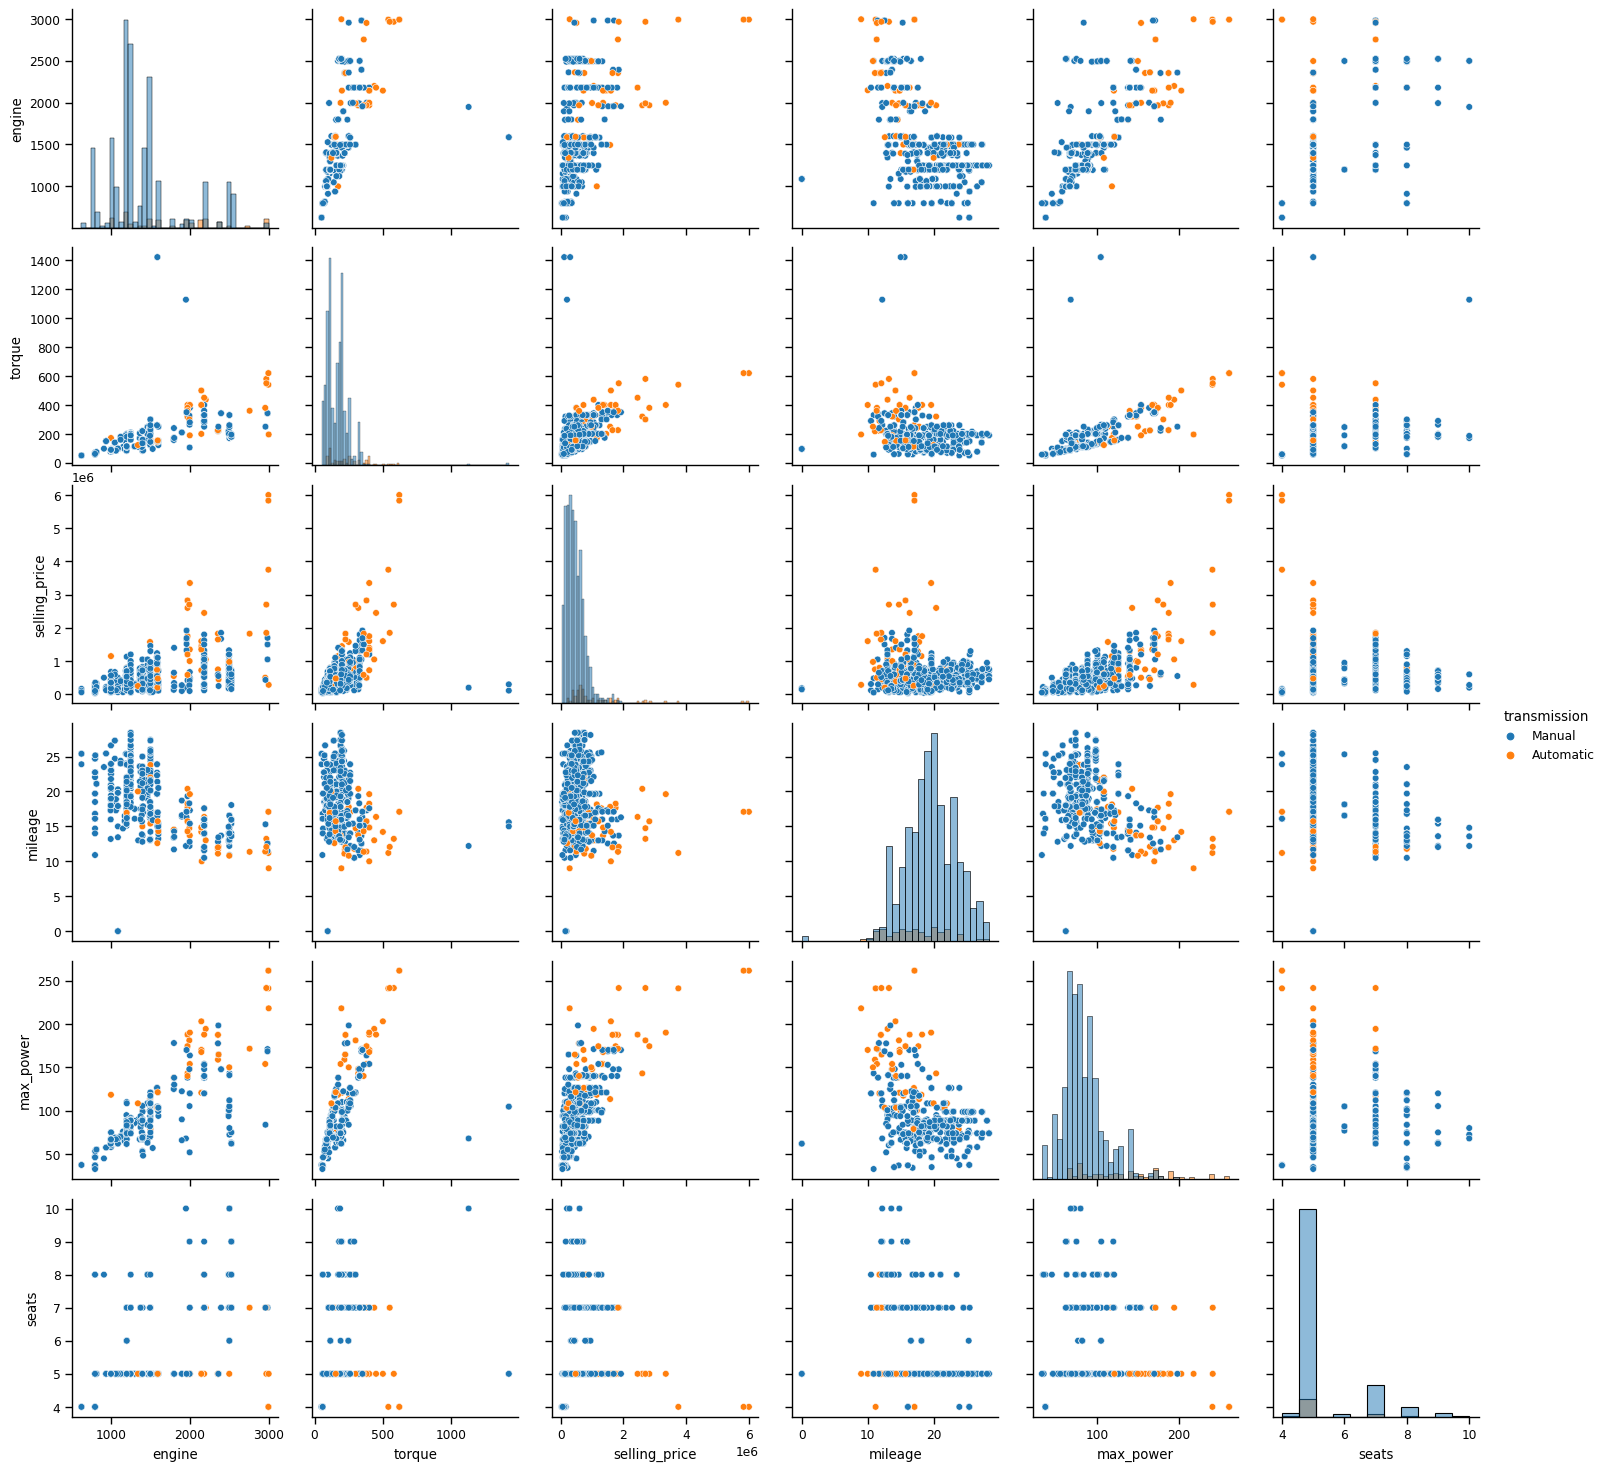

In [53]:
pairplot('transmission')

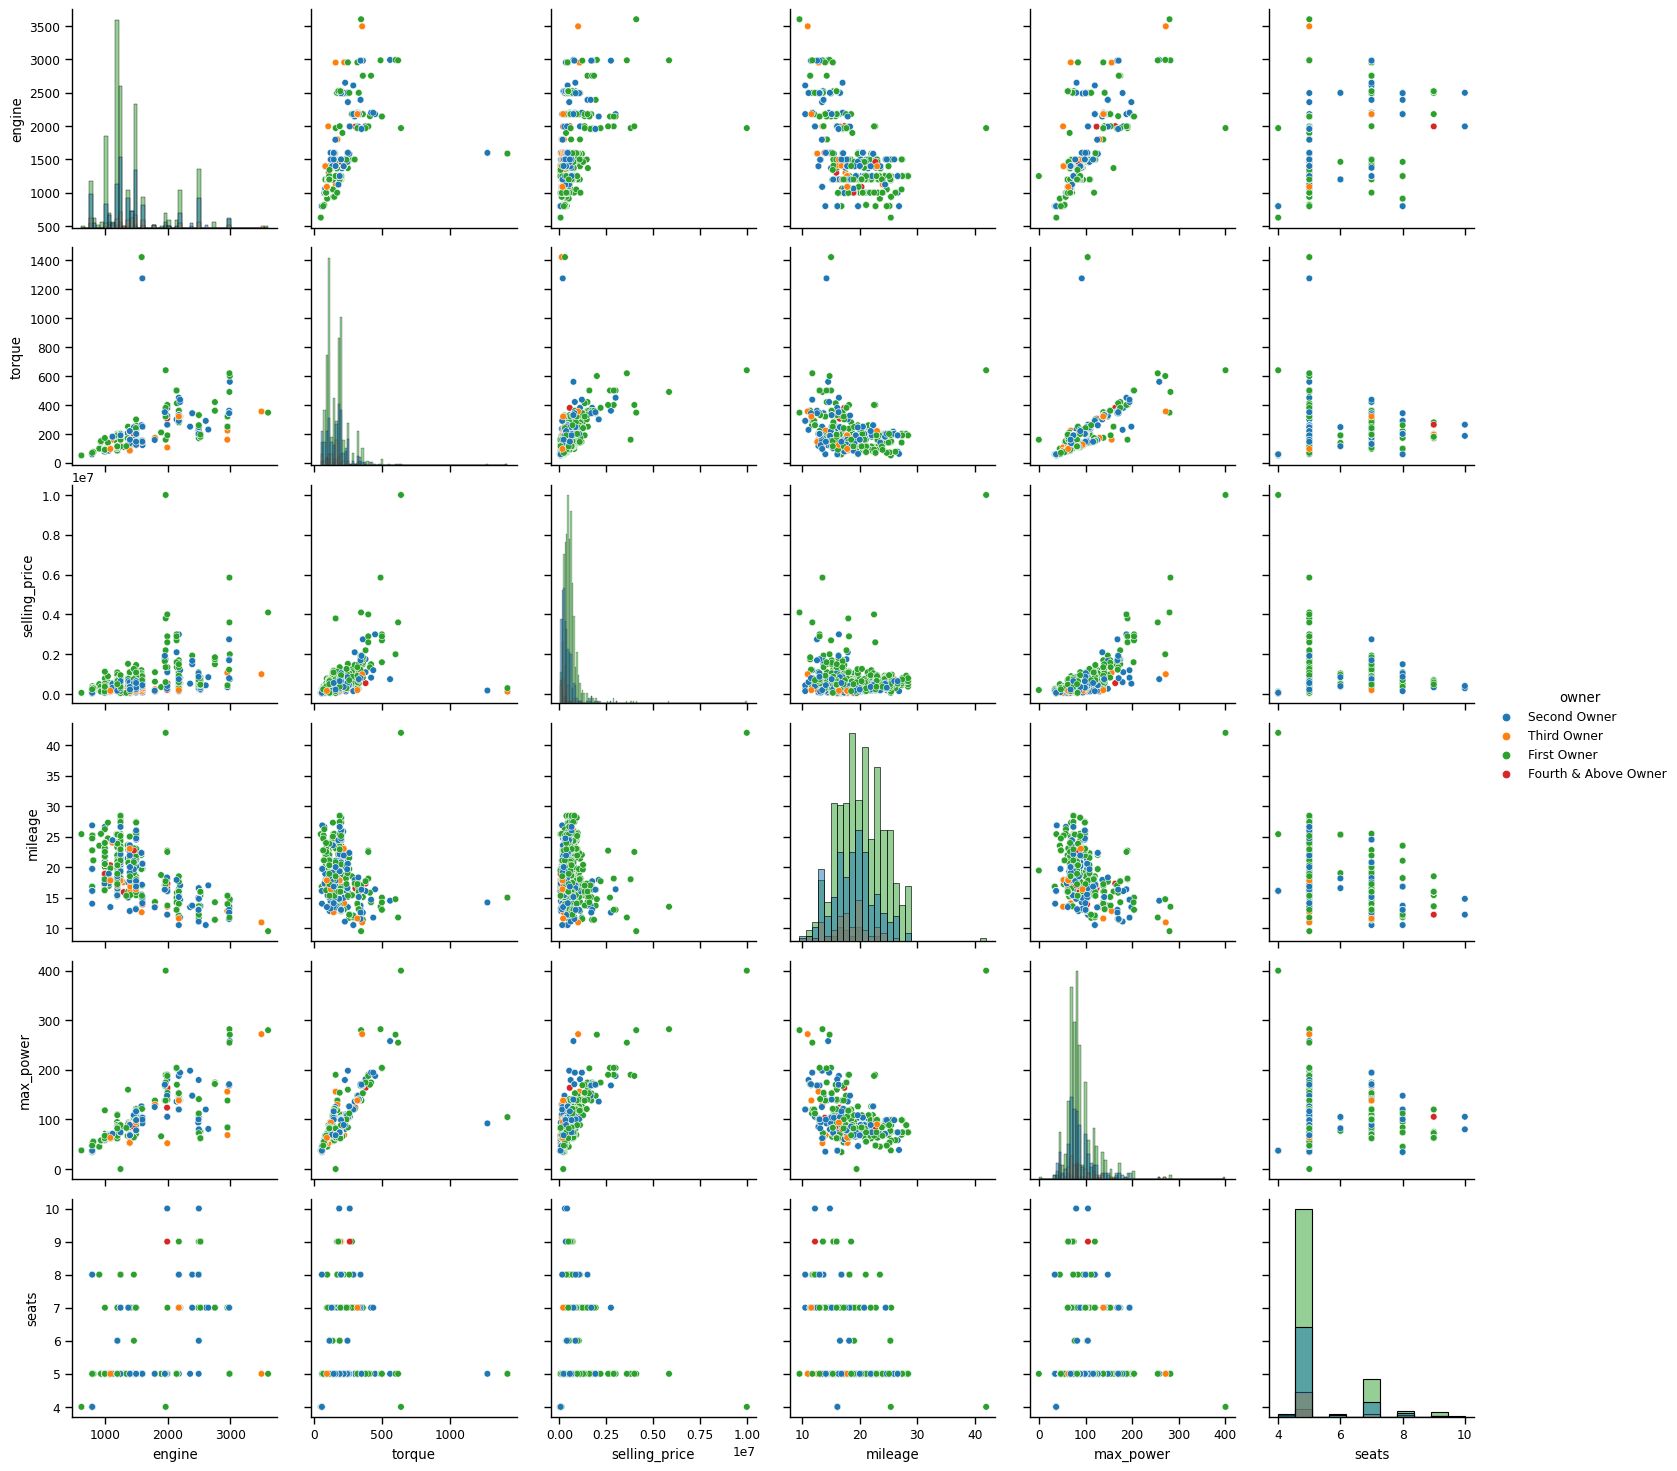

In [54]:
pairplot('owner')

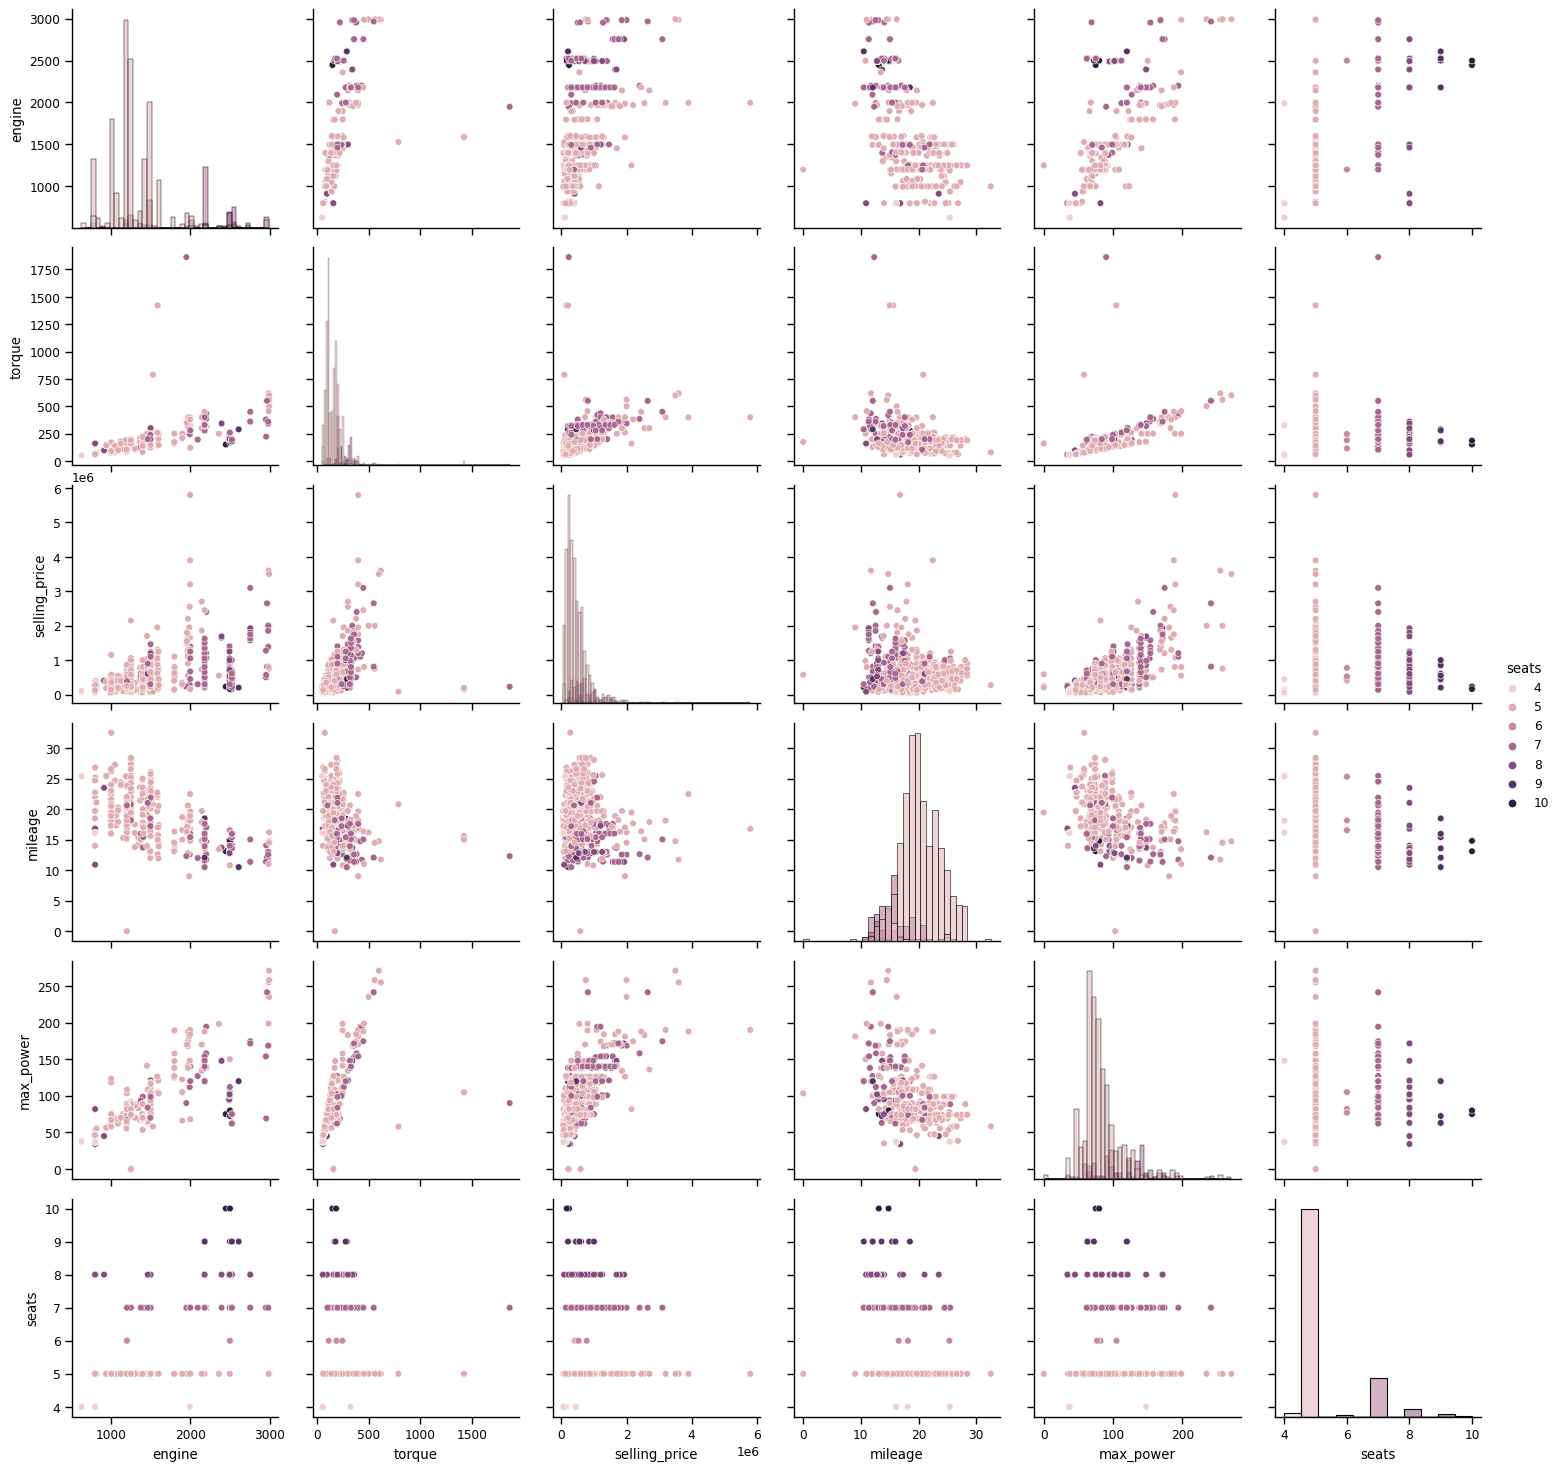

In [55]:
pairplot('seats')

Из гистограммы видно, что цена продажи распределена логнормально. В таких случаях будет корректнее взять логарифм от таргета, чтобы не нарушать предпосылку теоремы ГМ о нормальности остатков.

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [325]:
feats.remove('selling_price')
df_train.drop_duplicates(feats, inplace=True)

y_train = df_train['selling_price']
X_train = df_train[feats]

In [326]:
# Проверка не проходит, если добавить столбцы из torque 
assert X_train.shape == (5840, 6)

AssertionError: 

In [327]:
y_test = df_test['selling_price']
X_test = df_test[feats]

In [328]:
assert X_test.shape == (1000, 6)

AssertionError: 

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [329]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

def learn_regression(model=LinearRegression(), X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    lr = model
    model = lr.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = MSE(y_test, y_pred)

    print('r2', r2)
    print('mse', mse)
    return model

Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [330]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.fit_transform(X_test)

mod_ss = learn_regression(X_train=X_train_ss, y_train=y_train, X_test=X_test_ss)

r2 0.2552397248869448
mse 428109473240.128


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [331]:
display(pd.Series(dict(zip(X_train.columns, np.abs(mod_ss.coef_)))).sort_values())

print('Самый информативный признак по абсолютному значению - max_power')

mileage         548.239203
seats         16589.616286
max_rpm       20451.227262
torque        43108.651815
engine        57220.927604
km_driven     58489.841175
year         156504.249827
max_power    222319.939852
dtype: float64

Самый информативный признак по абсолютному значению - max_power


(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [332]:
from sklearn.linear_model import Lasso

mod_lasso = learn_regression(model=Lasso(),X_train=X_train_ss, y_train=y_train, X_test=X_test_ss)

r2 0.2552373816353517
mse 428110820208.05676


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [333]:
(mod_lasso.coef_ == 0).sum()

print('Нет, потому что коэффициент регуляризации слишком мал')

Нет, потому что коэффициент регуляризации слишком мал


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [334]:
from sklearn.model_selection import GridSearchCV

est = Lasso()
param_grid={'alpha':np.logspace(1e-3, 1e4, num=50)}
gc_cv = GridSearchCV(est, param_grid, cv=10)

res_lasso_gccv = learn_regression(gc_cv, X_train=X_train_ss, y_train=y_train, X_test=X_test_ss)

r2 0.2552373765402257
mse 428110823136.8807


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [266]:
mod_lasso_gccv = res_lasso_gccv.best_estimator_


print('Грид серчу пришлось обучать 50 моделей')

print('Лучший коэффициент - ', mod_lasso_gccv.alpha)
print(mod_lasso_gccv.coef_)
print('Веса не занулились')

Грид серчу пришлось обучать 50 моделей
Лучший коэффициент -  1.0023052380778996
[167233.96794492 -47089.02962303  13884.29847402  40744.77985927
 339911.79345966   5982.79928468 -26205.34606838 -33493.2175901 ]
Веса не занулились


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [267]:
from sklearn.linear_model import ElasticNet

est = ElasticNet()
param_grid={'alpha':np.logspace(1e-3, 1e4, num=50), 'l1_ratio':np.linspace(0,1,10)}
gc_cv = GridSearchCV(est, param_grid, cv=10)

res_elastic_gccv = learn_regression(gc_cv, X_train=X_train_ss, y_train=y_train, X_test=X_test_ss)

r2 0.5567506378113236
mse 254792390654.57855


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [268]:
mod_elastic_gccv = res_elastic_gccv.best_estimator_
y_pred_elastic_gccv = mod_elastic_gccv.predict(X_test_ss)
print(r2_score(y_test, y_pred_elastic_gccv))

print(f'Лучшие гиперпараметры aplha - {np.round(mod_elastic_gccv.alpha,4)}, l1_ration - {np.round(mod_elastic_gccv.l1_ratio,3)}')

0.5567506378113236
Лучшие гиперпараметры aplha - 1.0023, l1_ration - 0.889


Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [269]:
X_train_cat = df_train.drop(['selling_price','name'], axis=1)
X_test_cat = df_test.drop(['selling_price','name'], axis=1)
X_train_cat.shape

(5314, 12)

In [143]:
assert X_train_cat.shape == (5840, 10)

AssertionError: 

In [270]:
X_train_cat.describe(include='object')

fuel seller_type transmission        owner
count     5314        5314         5314         5314
unique       4           3            2            5
top     Diesel  Individual       Manual  First Owner
freq      2898        4708         4834         3301

(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [271]:
cat_cols = ['fuel','seller_type','transmission','owner','seats']
X_train_cat[cat_cols] = X_train_cat[cat_cols].astype(object)
X_test_cat[cat_cols] = X_test_cat[cat_cols].astype(object)

In [272]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas


enc = OneHotEncoder()
ohe = enc.fit(X = X_train_cat[cat_cols])

X_train_cat[enc.get_feature_names_out()] = ohe.transform(X_train_cat[cat_cols]).toarray()
X_train_cat.drop(cat_cols, axis=1, inplace=True)
X_test_cat[enc.get_feature_names_out()] = ohe.transform(X_test_cat[cat_cols]).toarray()
X_test_cat.drop(cat_cols, axis=1, inplace=True)

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [273]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

est = Ridge()
param_grid={'alpha':np.logspace(1e-3, 1e4, num=1000)}
gc_cv = GridSearchCV(est, param_grid, cv=10)

res_ridge_gccv = learn_regression(gc_cv, X_train=X_train_ss, y_train=y_train, X_test=X_test_ss)

print('Качество предсказаний заметно не улучшилось')

r2 0.5806027077046578
mse 241081539768.806
Качество предсказаний заметно не улучшилось


# Часть 4 - бонусная (1.5 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [337]:
# Логарифмировать таргет!
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

df_train = df_train.loc[(df_train.selling_price < 0.5e7),:]

df_train['km_driven'] = np.clip(df_train['km_driven'], 0, 0.5e6)
df_train['mileage'] = np.clip(df_train['mileage'], 10, 30)
df_train['mileage'].replace(0, np.mean(df_train['mileage']), inplace=True)
df_train['year'] = 2020-df_train['year']
df_train['max_power'] = np.clip(df_train['max_power'], 0, 300)
df_train['max_power'].replace(0, np.mean(df_train['max_power']), inplace=True)
df_train['torque'] = np.clip(df_train['torque'], 0, 750)

df_train.reset_index(drop=True, inplace=True)

y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

X_train_cat = df_train.drop(['selling_price','name'], axis=1)
X_test_cat = df_test.drop(['selling_price','name'], axis=1)

cat_cols = ['fuel','seller_type','transmission','owner','seats']
X_train_cat[cat_cols] = X_train_cat[cat_cols].astype(object)
X_test_cat[cat_cols] = X_test_cat[cat_cols].astype(object)

enc = OneHotEncoder(handle_unknown='ignore')
ohe = enc.fit(X = X_train_cat[cat_cols])

X_train_cat[enc.get_feature_names_out()] = ohe.transform(X_train_cat[cat_cols]).toarray()
X_train_cat.drop(cat_cols, axis=1, inplace=True)
X_test_cat[enc.get_feature_names_out()] = ohe.transform(X_test_cat[cat_cols]).toarray()
X_test_cat.drop(cat_cols, axis=1, inplace=True)

print('Видно, что R2 заметно вырос')
mod_log = learn_regression(y_train=y_train_log, y_test=y_test_log)

print('\nДобавим категориальные признаки, видим, что качество еще выросло')
mod_log_cat = learn_regression(y_train=y_train_log, y_test=y_test_log, X_train=X_train_cat, X_test=X_test_cat)

print('\nПопробуем натравить ElasticNet, из коробки работает хуже')
mod_log_elasticnet = learn_regression(model=ElasticNet(), y_train=y_train_log, y_test=y_test_log,
                                       X_train=X_train_cat, X_test=X_test_cat)

# print('\nElasticNet + RandomSearch, работает немного хуже')
# from sklearn.model_selection import RandomizedSearchCV

# est = ElasticNet()
# param_grid = {'alpha':np.logspace(1e-2, 1e4, num=50), 'l1_ratio':np.linspace(0,1,10)}
# rscv = GridSearchCV(est, param_grid, cv=10)
# mod_log_rscv_elasticnet = learn_regression(model=rscv, y_train=y_train_log, y_test=y_test_log,
#                                            X_train=X_train_cat, X_test=X_test_cat)

Видно, что R2 заметно вырос
r2 -65905.27492089823
mse 47143.230296679845

Добавим категориальные признаки, видим, что качество еще выросло
r2 0.8712878828265028
mse 0.092068698908658

Попробуем натравить ElasticNet, из коробки работает хуже
r2 0.809395501660275
mse 0.1363407622657719


In [339]:
import joblib

joblib.dump(ohe, 'OHE_v1.pkl')
joblib.dump(mod_log_cat, 'mod_log_cat_v1.pkl')

['mod_log_cat_v1.pkl']

In [278]:
# поиск выбросов и способы их заполнения

# выбросы по IQR
def get_iqr_outliers(series: pd.Series, method='clip'):
    vals = series.copy()
    vals.reset_index(drop=True, inplace=True)
    q1 = np.percentile(vals, 25)
    q3 = np.percentile(vals, 75)
    iqr = q3-q1
    lb = q1-1.5*iqr
    ub = q3+1.5*iqr

    mask = ((vals<lb) | (vals>ub))
    print('Outliers -', mask.sum())
    if method == 'null':
        vals.loc[mask] = np.NaN
    elif method == 'clip':
        vals.loc[vals<lb] = lb
        vals.loc[vals>ub] = ub
    else:
        pass

    return vals

# # Попробуем клиповать аутлайеров
# X_train_clip = X_train.copy()
# X_test_clip = X_test.copy()
# for feat in feats:
#     X_train_clip[feat] = get_iqr_outliers(df_train[feat], method='clip')
#     X_test_clip[feat] = get_iqr_outliers(df_test[feat], method='clip')

# learn_regression(X_train=X_train_clip, X_test=X_test_clip)

y_train = get_iqr_outliers(y_train)
X_train.iloc[:, y_train.isna().values]

# # Попробуем заполнять
# X_train_clip = X_train.copy()
# X_test_clip = X_test.copy()
# for feat in feats:
#     X_train_clip[feat] = get_iqr_outliers(df_train[feat], method='null')
#     X_test_clip[feat] = get_iqr_outliers(df_test[feat], method='null')

# learn_regression(X_train=X_train_clip, X_test=X_test_clip)


Outliers - 270


IndexError: Boolean index has wrong length: 5314 instead of 8

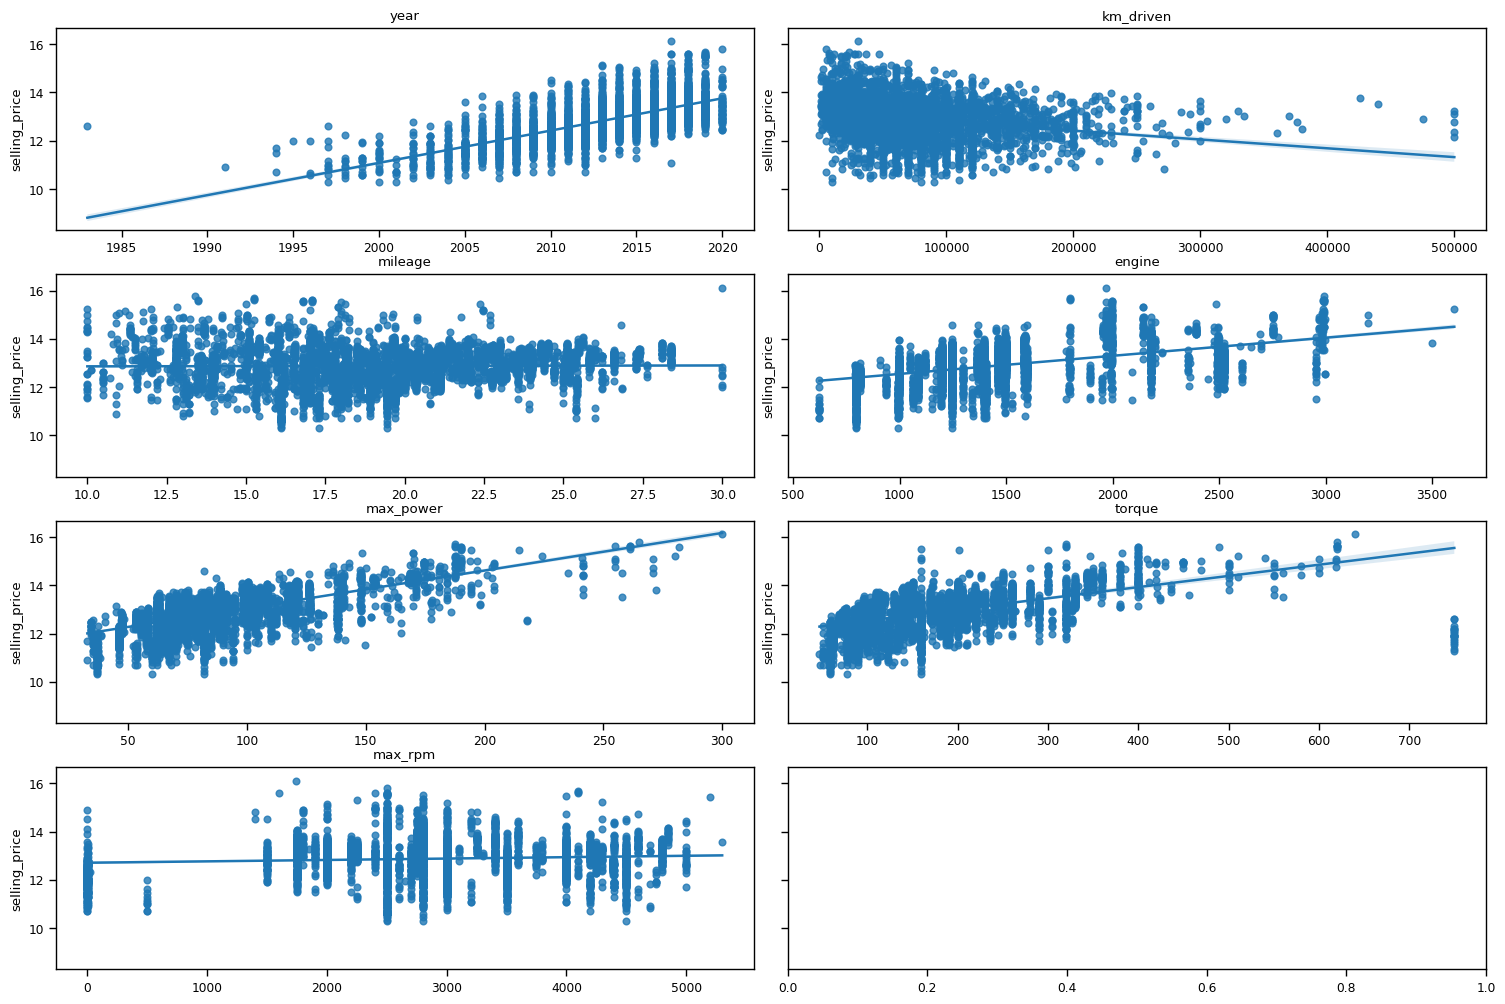

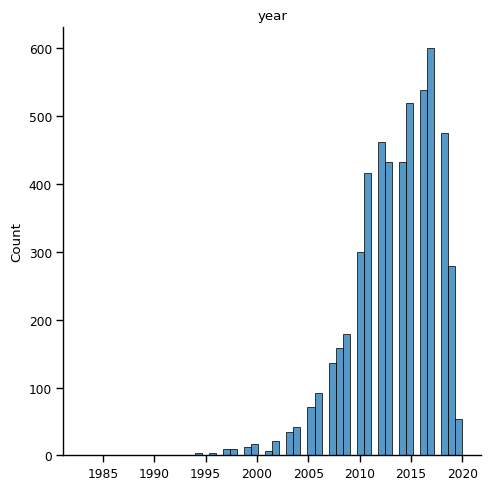

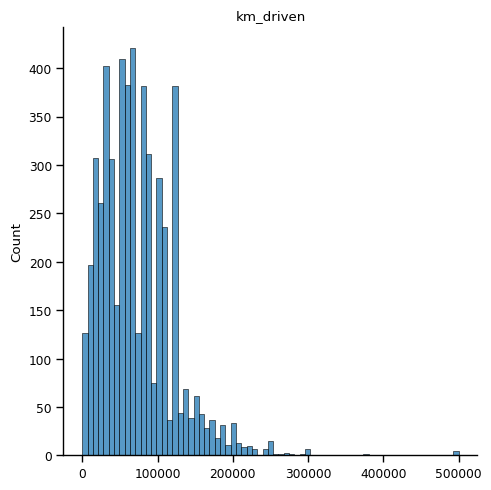

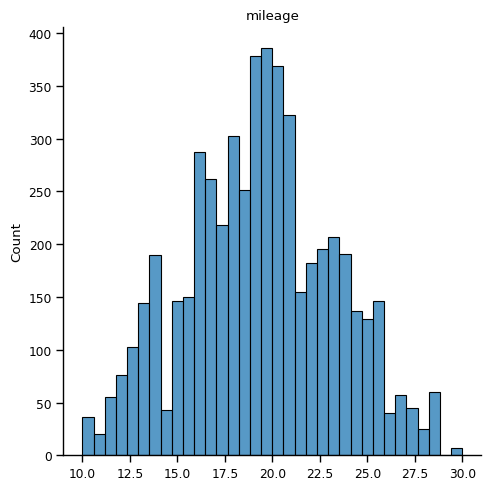

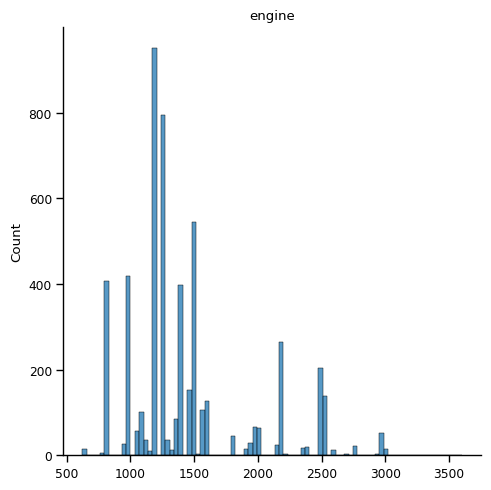

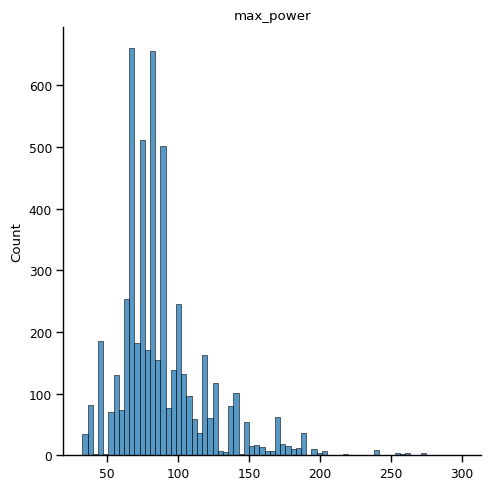

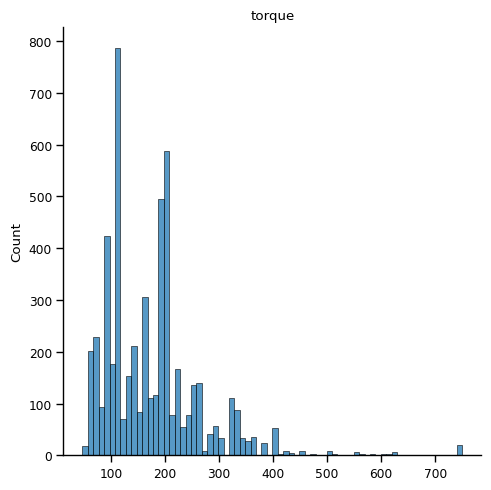

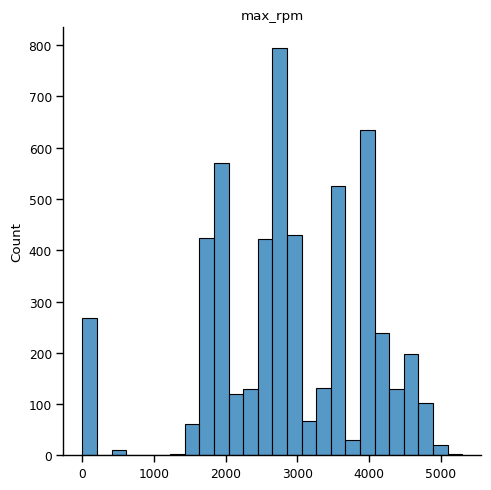

In [281]:
# Ручная очистка признаков
# Посмотрим на все числовые признаки на regplot

# У признаков mileage, max_power встречаются значения 0, по смыслу их быть не должно
# У признака km_driven есть две точки справа, которые сильно выделяются 
# У признака torque встречается несколько значений, которые заполнены странным значением

feats = ['year',
 'km_driven',
 'mileage',
 'engine',
 'max_power',
 'torque',
#  'seats',
 'max_rpm']

sns.set_context('paper')
fig, axes = plt.subplots(4, 2, figsize=(15,10), sharey=True)
fig.tight_layout()
for i in range(len(feats)):
    feat = feats[i]
    sns.regplot(ax=axes[i//2][i%2], x=X_train_cat[feat], y=y_train_log).set(title=feat, xlabel='')
    sns.displot(ax=axes[i//2][i%2], data=X_train_cat, x=feat).set(title=feat, xlabel='')

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [340]:
# Она же MAPE@10%))

def business_metrics(y_true, y_pred):
    mape = np.abs(y_true - y_pred)/y_true
    mape_10 = np.mean(mape <= 0.10)
    return mape_10

y_pred = mod_log_cat.predict(X_test_cat)
business_metrics(y_test, np.exp(y_pred))

0.278

Text(0, 0.5, 'selling_price')

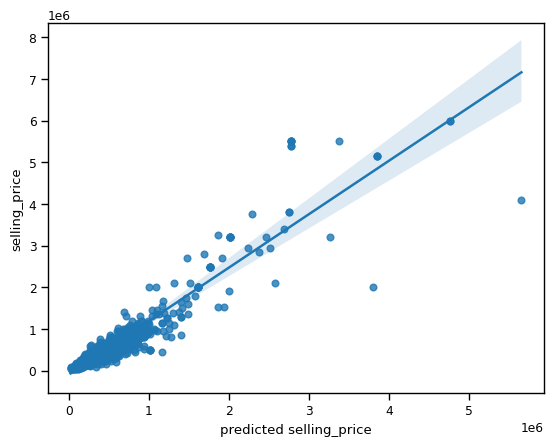

In [341]:
sns.regplot(x=np.exp(y_pred), y=y_test)
plt.xlabel('predicted selling_price')
plt.ylabel('selling_price')

<Axes: xlabel='selling_price', ylabel='error'>

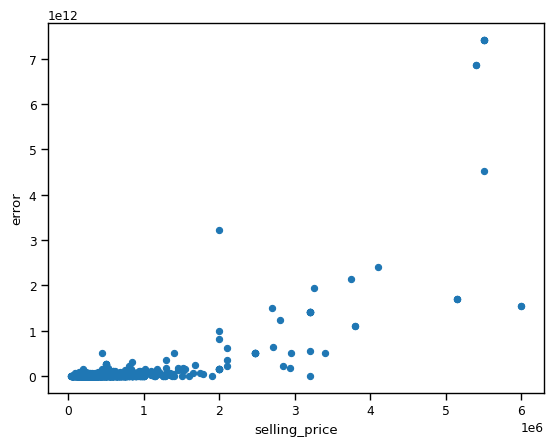

In [354]:
df_test['prediction'] = np.exp(y_pred)
df_test['error'] = (df_test['selling_price'] - df_test['prediction'])**2
df_test.sort_values('selling_price', ascending=True).plot(x='selling_price', y='error', kind='scatter')

# Видно, что в данных есть гетероскедастичность. Если наша цель - 

# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [215]:
# !pip3 install fastapi
import pandas as pd
import joblib
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()

model = joblib.load('mod_log_v1.pkl')
ohe = joblib.load('OHE_v0.pkl')
model_feats = model.feature_names_in_
ohe_feats = ohe.feature_names_in_

class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float
    max_rpm: float

class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    vals_dict = item.__dict__
    vals = pd.Series(item.__dict__) 
    ohe_vals = [int(x[0]) for x in ohe.transform(np.array(vals[ohe_feats]).reshape(1,-1)).toarray().reshape(-1,1)]
    cat_vals = dict(zip(ohe.get_feature_names_out(), ohe_vals))

    vals_dict.update(cat_vals)
    vals = pd.Series(vals_dict)

    features = np.array(vals[model_feats]).reshape(1,-1)
    log_prediction = model.predict(features)[0]

    return np.exp(log_prediction)
    # return vals

@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    results = []
    for item in items:
        results.append(predict_item(item))

    return results

t = [Item(**df_train.iloc[0].to_dict()), Item(**df_train.iloc[2].to_dict())]
predict_items(t)

[380284.49032927945, 306230.1805947759]

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link

In [363]:
import json
print(json.dumps(df_train.loc[0].to_dict()))

{"name": "Maruti Swift Dzire VDI", "year": 2014, "selling_price": 450000, "km_driven": 145500, "fuel": "Diesel", "seller_type": "Individual", "transmission": "Manual", "owner": "First Owner", "mileage": 23.4, "engine": 1248, "max_power": 74.0, "torque": 190.0, "seats": 5, "max_rpm": 2000.0}
